In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import pandas as pd
import datetime
import numpy as np
import datasets

In [2]:
main_page = datasets.enter.main_page()
signup_page = datasets.enter.signup_page()
complete_signup = datasets.complete.signup()

- 시간대 설정             
 UTC 기준이므로 +9시간

In [3]:
dataframes = [signup_page, complete_signup, main_page]
dataframes = [df.assign(client_event_time=pd.to_datetime(df['client_event_time']) + datetime.timedelta(hours=9)) for df in dataframes]

# 개별 데이터프레임 다시 할당
signup_page, complete_signup, main_page = dataframes

# 2. enter.signup_page
- 회원 가입 페이지 진입 

In [4]:
signup_page

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seoul,2023-04-06 06:30:42.557,South Korea,NaN,Samsung Phone,Samsung Galaxy A51 5G,enter.signup_page,Korean,Chrome,112.0.0.0,Web,NaN
1,Seoul,2023-04-06 06:37:41.467,South Korea,NaN,Samsung SM-S916N,NaN,enter.signup_page,Korean,Chrome,111.0.0.0,Web,NaN
2,Seoul,2023-04-06 06:05:53.237,South Korea,NaN,Apple iPhone,Apple iPhone,enter.signup_page,Korean,Mobile Safari,16.4,Web,NaN
3,Gangnam-gu,2023-04-06 06:41:58.269,South Korea,NaN,Mac,Mac,enter.signup_page,Korean,Safari,16.3,Web,NaN
4,Seoul,2023-04-06 06:44:53.294,South Korea,NaN,Mac,Mac,enter.signup_page,Korean,Safari,15.6.1,Web,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
596824,Dalseo-gu,2023-10-10 14:32:53.865,South Korea,NaN,Windows,Windows,enter.signup_page,Korean,Edge,114.0.1823.51,Web,NaN
596825,Hanam,2023-10-10 14:33:14.433,South Korea,NaN,Windows,Windows,enter.signup_page,Korean,Chrome,116.0.0.0,Web,NaN
596826,Seoul,2023-10-10 14:49:45.856,South Korea,NaN,Windows,Windows,enter.signup_page,Korean,Edge,117.0.2045.47,Web,NaN
596827,Dongjak-gu,2023-10-10 14:57:02.640,South Korea,NaN,Windows,Windows,enter.signup_page,Korean,Edge,117.0.2045.60,Web,NaN


In [5]:
signup_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596829 entries, 0 to 596828
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               581024 non-null  object        
 1   client_event_time  596829 non-null  datetime64[ns]
 2   country            596315 non-null  object        
 3   device_carrier     0 non-null       float64       
 4   device_family      596747 non-null  object        
 5   device_type        567387 non-null  object        
 6   event_type         596829 non-null  object        
 7   language           596829 non-null  object        
 8   os_name            596754 non-null  object        
 9   os_version         594650 non-null  object        
 10  platform           596829 non-null  object        
 11  user_id            0 non-null       float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 54.6+ MB


In [6]:
signup_page.isnull().sum()

city                  15805
client_event_time         0
country                 514
device_carrier       596829
device_family            82
device_type           29442
event_type                0
language                  0
os_name                  75
os_version             2179
platform                  0
user_id              596829
dtype: int64

In [ ]:
signup_page.nunique() 

city                   2471
client_event_time    596728
country                 180
device_carrier            0
device_family           849
device_type             552
event_type                1
language                 59
os_name                  34
os_version             1995
platform                  1
user_id                   0
dtype: int64

- client_event_time : 596728 -> 회원가입 페이지 방문 수는 총 596728번 있었던 것으로 확인됨
- 전체 행 대비 client_event_time 유니크 값을 비교했을 때, 동일한 시점에 방문한 경우가 101건 있는 것으로 확인됨
- user_id가 전부 null값 -> 회원 가입을 안 했으므로 null값 처리가 된듯함

In [44]:
duplicated_counts = signup_page['client_event_time'].value_counts()
duplicated_counts = duplicated_counts[duplicated_counts > 1]  
print(duplicated_counts.to_string())  
total_duplicates = duplicated_counts.sum() - len(duplicated_counts)
print(f"총 중복 발생 횟수: {total_duplicates}회")

2022-01-18 13:11:29.644    3
2022-01-18 13:12:06.995    3
2023-11-11 01:30:30.962    2
2022-06-11 20:08:33.130    2
2022-03-04 20:19:42.119    2
2023-03-08 18:16:07.726    2
2023-10-26 01:29:04.468    2
2023-02-12 21:03:03.170    2
2023-09-10 17:47:37.607    2
2022-10-17 22:59:08.951    2
2023-06-24 07:05:48.817    2
2022-10-17 22:58:39.535    2
2023-09-05 16:29:37.948    2
2023-01-17 21:30:41.794    2
2023-03-08 10:43:35.322    2
2022-08-12 21:14:27.729    2
2023-05-30 18:54:37.202    2
2023-01-23 11:10:34.023    2
2022-05-16 01:41:33.586    2
2022-11-18 02:20:53.326    2
2022-01-04 10:17:04.260    2
2023-11-08 23:24:18.618    2
2022-12-14 16:33:10.110    2
2023-04-12 18:00:50.309    2
2022-04-14 13:09:35.057    2
2022-02-18 13:26:01.566    2
2022-01-27 17:34:19.156    2
2023-01-06 04:25:01.688    2
2022-03-22 00:09:47.643    2
2023-11-02 00:10:50.832    2
2023-02-28 14:17:56.638    2
2022-03-20 21:15:45.125    2
2022-12-09 02:34:40.825    2
2023-01-16 18:36:08.167    2
2022-12-16 13:

In [ ]:
counts = {'City': signup_page['city'].value_counts().sort_values(ascending=False),
					'Language': signup_page['language'].value_counts().sort_values(ascending=False),
					'Device Type': signup_page['device_type'].value_counts().sort_values(ascending=False),
					'Os Name': signup_page['os_name'].value_counts().sort_values(ascending=False),
					'User Id': signup_page['user_id'].value_counts().sort_values(ascending=False)
}

for key, value in counts.items():
	print(f"=== {key} ===")
	print(value, end="\n\n")

=== City ===
Seoul                     125164
Gangnam-gu                 20419
Suwon                      15216
Seongnam-si                15124
Yongin-si                  12004
                           ...  
Yamanashi                      1
Sao Sebastiao do Passe         1
Hagerstown                     1
Annandale                      1
Haldwani                       1
Name: city, Length: 2471, dtype: int64

=== Language ===
Korean         567173
English         25156
Arabic            720
Japanese          653
Chinese           593
French            421
Spanish           335
Russian           334
Vietnamese        272
Indonesian        189
Persian           181
Hindi             155
German            130
Uzbek              90
Thai               73
Portuguese         60
Turkish            28
Khmer              27
Mongolian          25
Bengali            19
Italian            14
Azerbaijani        14
Polish             11
Norwegian          10
Burmese            10
Dutch            

- 회원 가입 페이지 방문자의 접속 기기는 윈도우가 236839건으로 가장 높게 나타났다.
- 회원 가입 페이지 방문자 브라우저의 경우 인스타가 64244건으로 두번째로 많게 나타났다. -> 인스타 광고의 효과도 있는 것으로 추측됨

In [ ]:
first_signup_page = signup_page['client_event_time'].min()
last_signup_page = signup_page['client_event_time'].max()

print(f"처음 content_page 이벤트 발생일 : {first_signup_page}")
print(f"마지막 content_page 이벤트 발생일 : {last_signup_page}")

처음 content_page 이벤트 발생일 : 2021-11-25 09:08:17.825000
마지막 content_page 이벤트 발생일 : 2024-01-01 08:59:22.267000


# 3. complete.signup
- 회원가입 완료

In [ ]:
complete_signup

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,type
0,NaN,2023-04-06 06:33:26.068,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,74d17c27a41656e7788b0c81d9f76cda,kakao
1,NaN,2023-04-06 06:45:18.672,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,06b6868000a5d576180aca47896d6cce,kakao
2,Seo-gu,2023-04-10 23:47:56.424,South Korea,NaN,Windows,Windows,complete.signup,Korean,Chrome,111.0.0.0,Web,e131c319972bd580146c5a2faba26613,kakao
3,Suwon,2023-04-10 23:25:45.920,South Korea,NaN,Apple iPhone,Apple iPhone,complete.signup,Korean,Mobile Safari,16.3,Web,e3b8bfa80d866f296aad139e09023ef3,naver
4,NaN,2023-04-10 23:09:50.698,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,5208a60918f18562ac9d668a35b20303,kakao
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145128,NaN,2023-10-10 14:10:04.854,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,0117038cc69fe8a40388ec19bb0a495e,kakao
145129,NaN,2023-10-10 14:16:31.995,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,bc1a28ff902daba9399e7f602cc86285,kakao
145130,NaN,2023-10-10 14:27:53.140,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,0d507104136f139cbc9f6fa1db365162,google
145131,NaN,2023-10-10 14:33:30.471,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,298e200203472e5bc0f9a14053e1dfe1,google


In [ ]:
complete_signup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145133 entries, 0 to 145132
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               44774 non-null   object        
 1   client_event_time  145133 non-null  datetime64[ns]
 2   country            45756 non-null   object        
 3   device_carrier     0 non-null       float64       
 4   device_family      45767 non-null   object        
 5   device_type        44659 non-null   object        
 6   event_type         145133 non-null  object        
 7   language           45767 non-null   object        
 8   os_name            45745 non-null   object        
 9   os_version         45651 non-null   object        
 10  platform           45767 non-null   object        
 11  user_id            145133 non-null  object        
 12  type               144958 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)

In [ ]:
complete_signup.isnull().sum()

city                 100359
client_event_time         0
country               99377
device_carrier       145133
device_family         99366
device_type          100474
event_type                0
language              99366
os_name               99388
os_version            99482
platform              99366
user_id                   0
type                    175
dtype: int64

In [ ]:
complete_signup.nunique()

city                    543
client_event_time    145132
country                  56
device_carrier            0
device_family            67
device_type             167
event_type                1
language                 16
os_name                  19
os_version              844
platform                  1
user_id              145133
type                      6
dtype: int64

In [ ]:
counts = {'City': complete_signup ['city'].value_counts().sort_values(ascending=False),
					'Language': complete_signup ['language'].value_counts().sort_values(ascending=False),
					'Device Type': complete_signup ['device_type'].value_counts().sort_values(ascending=False),
					'Os Name': complete_signup ['os_name'].value_counts().sort_values(ascending=False),
					'User Id': complete_signup ['user_id'].value_counts().sort_values(ascending=False),
					'Type': complete_signup ['type'].value_counts().sort_values(ascending=False),
}

for key, value in counts.items():
		print(f"=== {key} ===")
		print(value, end="\n\n")

=== City ===
Seoul              8564
Gangnam-gu         1311
Suwon              1264
Seongnam-si        1181
Yongin-si           975
                   ... 
New Brunswick         1
North Vancouver       1
Danyang               1
Mountain View         1
Redwood City          1
Name: city, Length: 543, dtype: int64

=== Language ===
Korean        44163
English        1466
Japanese         50
Chinese          23
Vietnamese       16
French           12
Russian          12
German            7
Spanish           6
Uzbek             4
Indonesian        3
Ukrainian         1
Turkish           1
Arabic            1
Galician          1
Portuguese        1
Name: language, dtype: int64

=== Device Type ===
Windows                         21981
Apple iPhone                     5920
Android                          5280
Mac                              3822
Samsung Galaxy S21 5G             366
                                ...  
Apple iPad Mini 5th Gen             1
Samsung Galaxy S10 Plus        

- 총 145133 유저id -> 145133명이 회원 가입을 완료한 것으로 확인됨
- test는 개발 단계 필터가 안된 것으로 보임 -> 전처리 필요

In [ ]:
first_complete_signup = complete_signup['client_event_time'].min()
last_complete_signup = complete_signup['client_event_time'].max()

print(f"처음 content_page 이벤트 발생일 : {first_complete_signup}")
print(f"마지막 content_page 이벤트 발생일 : {last_complete_signup}")

처음 content_page 이벤트 발생일 : 2022-01-01 09:06:31.232000
마지막 content_page 이벤트 발생일 : 2024-01-01 08:51:53.728000


# enter.main_page
- 메인 페이지 진입

In [ ]:
main_page

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seongnam-si,2023-04-05 21:55:06.140000,South Korea,NaN,Samsung Phone,Samsung Galaxy S21 5G,enter.main_page,Korean,Whale,1.0.0.0,Web,NaN
1,Dongdaemun-gu,2023-04-05 21:04:28.967000,South Korea,NaN,Mac,Mac,enter.main_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4
2,Hwaseong-si,2023-04-05 21:01:31.258000,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
3,Hwaseong-si,2023-04-05 21:02:50.374000,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
4,Seoul,2023-04-05 21:30:33.727000,South Korea,NaN,Samsung Phone,Samsung Galaxy A51 5G,enter.main_page,Korean,Chrome,112.0.0.0,Web,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2133543,Jeongeup,2023-10-10 05:53:29.283000,South Korea,NaN,Windows,Windows,enter.main_page,Korean,Chrome,117.0.0.0,Web,NaN
2133544,Jeongeup,2023-10-10 05:54:17.572000,South Korea,NaN,Windows,Windows,enter.main_page,Korean,Chrome,117.0.0.0,Web,NaN
2133545,Gangnam-gu,2023-10-10 05:54:33.164000,South Korea,NaN,Windows,Windows,enter.main_page,Korean,Chrome,117.0.0.0,Web,NaN
2133546,Saha-gu,2023-10-10 05:58:15.175000,South Korea,NaN,Samsung Phone,Samsung Galaxy S23+,enter.main_page,Korean,Instagram,303.0.0.40.109,Web,NaN


In [ ]:
main_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133548 entries, 0 to 2133547
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time  object 
 2   country            object 
 3   device_carrier     float64
 4   device_family      object 
 5   device_type        object 
 6   event_type         object 
 7   language           object 
 8   os_name            object 
 9   os_version         object 
 10  platform           object 
 11  user_id            object 
dtypes: float64(1), object(11)
memory usage: 195.3+ MB


In [ ]:
main_page.isnull().sum()

city                   56988
client_event_time          0
country                 1869
device_carrier       2133548
device_family           2813
device_type            60050
event_type                 0
language                   0
os_name                 2304
os_version             13868
platform                   0
user_id              1611032
dtype: int64

In [ ]:
main_page.nunique()

city                    3429
client_event_time    2132195
country                  172
device_carrier             0
device_family            677
device_type              529
event_type                 1
language                  62
os_name                   41
os_version              2716
platform                   1
user_id                75365
dtype: int64

In [ ]:
main_page['os_name'].value_counts()

Chrome                  996473
Mobile Safari           255461
Instagram               203370
Edge                    129310
Samsung Browser         126208
Chrome WebView           92656
Whale                    78587
Safari                   69421
Chrome Mobile            63765
WebKit                   54112
Facebook                 38996
GSA                      11260
Firefox                   6280
Chrome Headless           2775
Opera                     1280
Avast Secure Browser       279
Yandex                     259
MIUI Browser               234
Android Browser            213
Electron                    45
Opera Touch                 41
WeChat                      36
Silk                        35
IE                          35
Puffin                      34
Line                        22
AVG Secure Browser          15
Chromium                    11
UCBrowser                    7
Firefox Focus                5
baiduboxapp                  5
Quark                        3
Opera Mi

In [ ]:
first_main_page = main_page['client_event_time'].min()
last_main_page = main_page['client_event_time'].max()

print(f"처음 content_page 이벤트 발생일 : {first_main_page}")
print(f"마지막 content_page 이벤트 발생일 : {last_main_page}")

처음 content_page 이벤트 발생일 : 1978-01-01 19:22:27.371000
마지막 content_page 이벤트 발생일 : 2023-12-15 11:46:11.182000


In [ ]:
main_page['client_event_time'].sort_values(ascending=True).head(20)

335232    1978-01-01 19:22:27.371
593046    1978-01-18 06:13:44.128
298406    1978-05-14 21:39:01.444
1236626   1978-06-22 22:49:53.470
1279461   1978-06-29 23:25:57.913
1296083   1978-07-01 03:25:20.097
1291472   1978-11-25 06:08:54.660
698511    1978-12-04 07:02:40.951
1191924   1978-12-09 21:34:35.952
775951    1978-12-24 21:16:41.061
811316    2021-05-10 15:16:35.916
1340251   2021-11-05 01:12:27.771
891546    2021-11-07 17:14:29.783
925768    2021-11-09 15:56:17.008
1354288   2021-11-09 16:53:46.140
601481    2021-11-10 15:55:46.494
858830    2021-11-12 12:22:32.283
1603725   2021-11-13 16:35:30.587
610924    2021-11-13 16:49:28.171
1210496   2021-11-16 09:56:36.694
Name: client_event_time, dtype: datetime64[ns]

In [ ]:
df_main_page = main_page.query("client_event_time.dt.year != 1978")

In [14]:
df_main_page['client_event_time'].sort_values(ascending=True).head(20)

811316    2021-05-10 15:16:35.916
1340251   2021-11-05 01:12:27.771
891546    2021-11-07 17:14:29.783
925768    2021-11-09 15:56:17.008
1354288   2021-11-09 16:53:46.140
601481    2021-11-10 15:55:46.494
858830    2021-11-12 12:22:32.283
1603725   2021-11-13 16:35:30.587
610924    2021-11-13 16:49:28.171
1210496   2021-11-16 09:56:36.694
925914    2021-11-17 11:18:23.945
1508423   2021-11-17 18:53:43.543
1060988   2021-11-18 11:47:59.029
824056    2021-11-19 23:32:37.041
1347524   2021-11-25 09:07:36.257
1347525   2021-11-25 09:08:25.218
1347492   2021-11-25 09:10:22.240
1347493   2021-11-25 09:12:54.596
1251277   2021-11-25 17:59:15.344
1045249   2021-11-25 23:30:37.619
Name: client_event_time, dtype: datetime64[ns]

In [16]:
first_main_visit = df_main_page.groupby('user_id')['client_event_time'].min().reset_index()
first_main_visit

,user_id,client_event_time
0,0000572f2ba8079bcefd2760b632e820,2023-03-18 19:34:22.282
1,000087537cbfd934375364218ff10f91,2023-04-02 07:27:42.058
2,00012b6dbfccfb458ad0d08f34477944,2022-01-02 10:18:06.966
3,0001435bc6c0c0f05315192f89275425,2023-01-16 09:59:10.191
4,0002a612daa63284cc741241df6f4b11,2022-06-02 15:10:41.034
...,...,...
75360,fffcae39952c396123f9a3c0808a2183,2022-01-17 14:14:57.415
75361,fffcbf8ded60b689e9867bff455f4ab7,2022-09-11 16:24:25.278
75362,fffd757f689e039a1d4db0adc1b80b61,2023-01-16 20:11:19.849
75363,fffda4a01bb29816480a08670ba48568,2022-01-19 23:53:03.138


In [ ]:
first_complete_signup = complete_signup.groupby('user_id')['client_event_time'].min().reset_index()
first_complete_signup

,user_id,client_event_time
0,0000572f2ba8079bcefd2760b632e820,2023-03-18 19:33:16.237
1,000087537cbfd934375364218ff10f91,2023-03-27 13:54:01.257
2,000117267e1dd62481ef3ae7fb420107,2022-12-16 14:05:24.926
3,0001f15911b404f3bf5b8571afafa4e4,2023-11-19 11:53:43.023
4,0001f28a707789a7d78dc28fd2e84dce,2023-10-16 00:09:34.334
...,...,...
145128,fffe529de03d6187ef7ed765650c8d2b,2023-02-26 22:40:51.953
145129,fffee4d401b390a681491b9f5cfe40fb,2023-12-31 16:37:01.064
145130,fffef868442fc8f4f405894b8ff8959f,2023-07-03 13:52:16.228
145131,ffffd8d78865a66cb3706977f29d1dec,2023-09-11 19:06:34.388


In [ ]:
counts = {'City': df_main_page ['city'].value_counts().sort_values(ascending=False),
		  'Country': df_main_page ['country'].value_counts().sort_values(ascending=False),
		  'Language': df_main_page ['language'].value_counts().sort_values(ascending=False),
		  'Device Type': df_main_page ['device_type'].value_counts().sort_values(ascending=False),
		  'Os Name': df_main_page ['os_name'].value_counts().sort_values(ascending=False),
		  'User Id': df_main_page ['user_id'].value_counts().sort_values(ascending=False)
}

for key, value in counts.items():
		print(f"=== {key} ===")
		print(value, end="\n\n")

=== City ===
Seoul            532425
Gangnam-gu        62074
Suwon             54819
Seongnam-si       53785
Yongin-si         40355
                  ...  
Reggio Emilia         1
St. John's            1
Bergheim              1
Jonava                1
Wetumpka              1
Name: city, Length: 3429, dtype: int64

=== Country ===
South Korea      2079303
United States      18925
Japan               5329
Canada              4142
Germany             3009
                  ...   
Mauritania             1
Kosovo                 1
Somalia                1
Botswana               1
Guyana                 1
Name: country, Length: 172, dtype: int64

=== Language ===
Korean      2021080
English      104838
Japanese       2416
Chinese        1316
Russian         792
             ...   
Oriya             1
Catalan           1
Latvian           1
Albanian          1
Bengali           1
Name: language, Length: 62, dtype: int64

=== Device Type ===
Windows                                        8454

In [ ]:
# user_id가 없는 메인 페이지 방문자들의 주요 특성(도시, 국가, 언어, 기기 등) 
df2_main_page = df_main_page[df_main_page['user_id'].isnull()]

counts = {
    'City': df2_main_page['city'].value_counts().sort_values(ascending=False).head(10),
    'Country': df2_main_page['country'].value_counts().sort_values(ascending=False).head(10),
    'Language': df2_main_page['language'].value_counts().sort_values(ascending=False).head(10),
    'Device Type': df2_main_page['device_type'].value_counts().sort_values(ascending=False).head(10),
    'Os Name': df2_main_page['os_name'].value_counts().sort_values(ascending=False).head(10)
}

for key, value in counts.items():
    print(f"=== {key} ===")
    print(value.to_string(), end="\n\n")

=== City ===
Seoul          429644
Gangnam-gu      48882
Seongnam-si     39142
Suwon           37974
Yongin-si       29190
Seocho-gu       25347
Goyang-si       25176
Seo-gu          24287
Gwanak-gu       24135
Buk-gu          23257

=== Country ===
South Korea       1568137
United States       16368
Japan                3694
Canada               2276
Ireland              2104
Germany              1950
Australia            1470
United Kingdom       1382
India                1174
Singapore            1171

=== Language ===
Korean        1524988
English         79623
Japanese         1811
Chinese          1186
Vietnamese        670
Russian           658
French            441
German            328
Spanish           325
Thai              151

=== Device Type ===
Windows                      539192
Apple iPhone                 315460
Mac                          141482
Android                      113087
Samsung Galaxy S21 5G         21761
Samsung Galaxy Z Flip3 5G     17613
Samsung Galaxy 

### 메인 페이지 진입 후 가입

In [ ]:
# 최초 메인 페이지 진입일 계산
df_first_main_visit = df_main_page.groupby('user_id')['client_event_time'].min().reset_index()
df_first_main_visit.rename(columns={'client_event_time': 'first_main_visit_date'}, inplace=True)

# 최초 가입일 계산
first_complete_signup = complete_signup.groupby('user_id')['client_event_time'].min().reset_index()
first_complete_signup.rename(columns={'client_event_time': 'first_signup_date'}, inplace=True)

# user_id를 기준으로 메인 페이지 진입 후 가입을 보기 위해 LEFT JOIN으로 메인 페이지 방문 후 가입 정보 결합
df_user_journey = pd.merge(df_first_main_visit, first_complete_signup, on='user_id', how='left')

In [47]:
df_user_journey['time_to_signup'] = (df_user_journey['first_signup_date'] - df_user_journey['first_main_visit_date']).dt.days
df_user_journey['time_to_signup'].mean()

-7.618691999341058

In [22]:
df_user_journey['signup_category'] = df_user_journey['time_to_signup'].apply(
    lambda x: '즉시 가입' if x == 0 else ('지연 가입' if x > 0 else '미가입')
)

df_user_journey['signup_category'].value_counts(normalize=True) * 100

미가입      93.970676
즉시 가입     6.018709
지연 가입     0.010615
Name: signup_category, dtype: float64

미가입: 방문했지만 가입하지 않은 비율이 93.97% -> 대부분의 방문 유저가 회원 가입 페이지에서 바로 가입한 것으로 추측됨                  
즉시 가입: 메인 페이지 방문한 당일 가입한 비율이 6.01%                      
지연 가입: 방문 후 며칠 지나고 가입한 비율이 0.01%                              

In [21]:
signup_conversion_rate = df_user_journey['first_signup_date'].notnull().mean() * 100
print(f"가입 전환율: {signup_conversion_rate:.2f}%")

가입 전환율: 72.49%


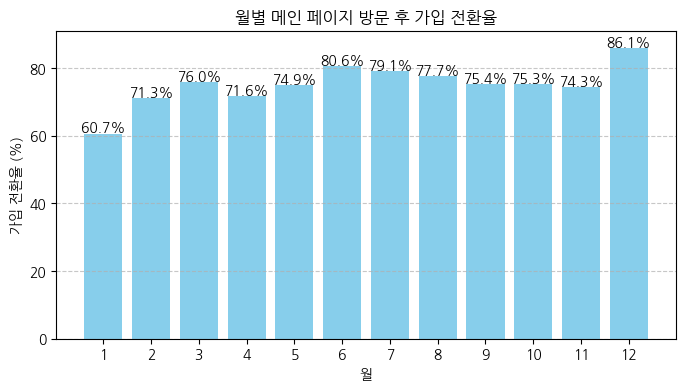

In [32]:
df_user_journey['visit_month'] = df_user_journey['first_main_visit_date'].dt.month
monthly_conversion = df_user_journey.groupby('visit_month')['first_signup_date'].count() / df_user_journey.groupby('visit_month')['user_id'].count() * 100

plt.figure(figsize=(8, 4))
bars = plt.bar(monthly_conversion.index, monthly_conversion.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.1f}%", ha='center', fontsize=10)

plt.title("월별 메인 페이지 방문 후 가입 전환율")
plt.ylabel("가입 전환율 (%)")
plt.xlabel("월")
plt.xticks(monthly_conversion.index)  
plt.ylim(0, max(monthly_conversion.values) + 5) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

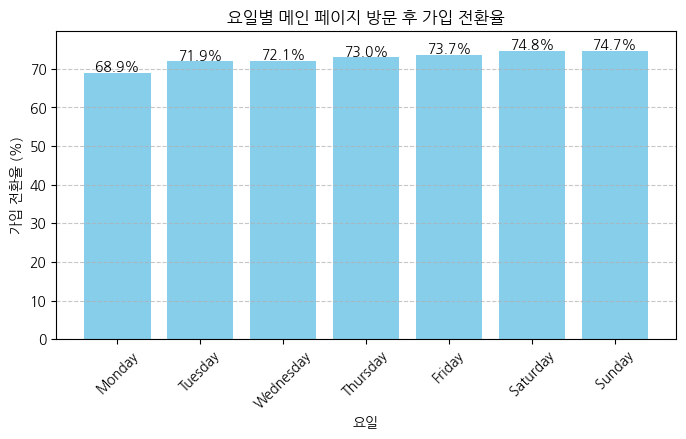

In [ ]:
import matplotlib.pyplot as plt

df_user_journey['visit_weekday'] = df_user_journey['first_main_visit_date'].dt.day_name()
weekday_conversion = df_user_journey.groupby('visit_weekday')['first_signup_date'].count() / df_user_journey.groupby('visit_weekday')['user_id'].count() * 100

plt.figure(figsize=(8, 4))

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_conversion = weekday_conversion.reindex(weekday_order)

bars = plt.bar(weekday_conversion.index, weekday_conversion.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.1f}%", ha='center', fontsize=10)

plt.title("요일별 메인 페이지 방문 후 가입 전환율")
plt.ylabel("가입 전환율 (%)")
plt.xlabel("요일")
plt.xticks(rotation=45) 
plt.ylim(0, max(weekday_conversion.values) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

- 월별 메인 페이지 진입 후 가입 전환율은 12월달이 86.1%로 가장 높게 나타났다.
- 요일별 메인 페이지 진입 후 가입 전환율은 토요일이 74.8%로 가장 높게 나타났다.

# EDA 시각화

#### 월별 회원가입 진입 및 완료 수

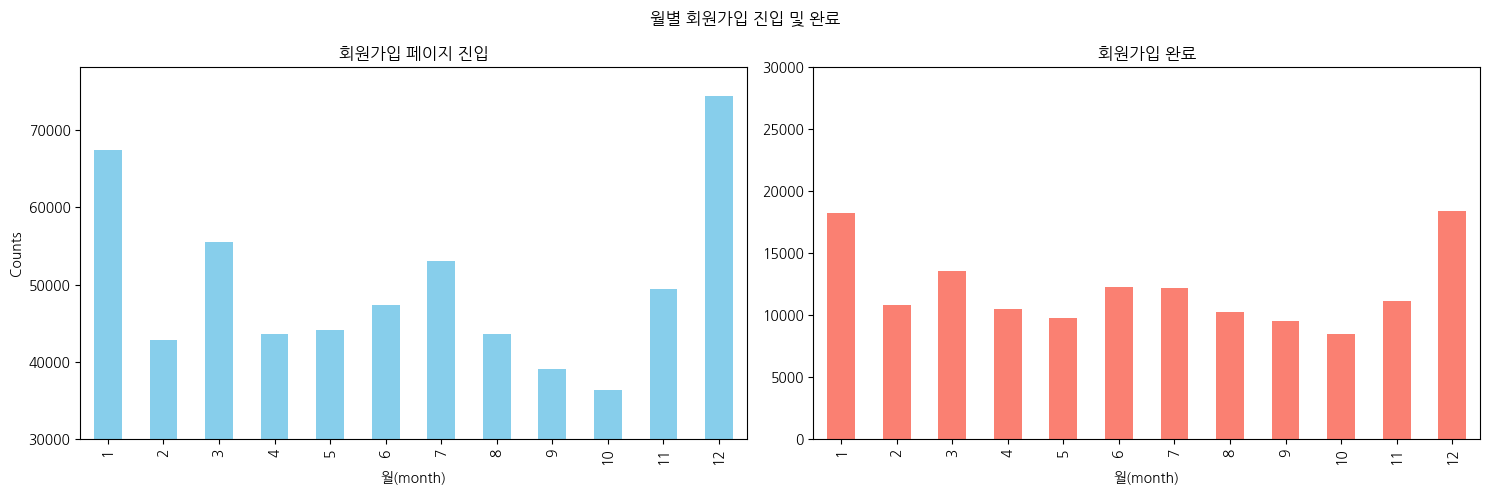

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1행 2열의 서브플롯 생성

# 회원가입 페이지 진입
signup_page['client_event_time'].dt.month.value_counts().sort_index().plot(
    kind='bar', ax=axes[0], color='skyblue'
)
axes[0].set_title('회원가입 페이지 진입')
axes[0].set_ylabel('Counts')
axes[0].set_xlabel('월(month)')
axes[0].set_ylim(30000) 

# 회원가입 완료
complete_signup['client_event_time'].dt.month.value_counts().sort_index().plot(
    kind='bar', ax=axes[1], color='salmon'
)
axes[1].set_title('회원가입 완료')
axes[1].set_xlabel('월(month)')
axes[1].set_ylim(0, 30000) 

plt.suptitle('월별 회원가입 진입 및 완료')  
plt.tight_layout()
plt.show()

#### 요일별 회원가입 진입 및 완료 수

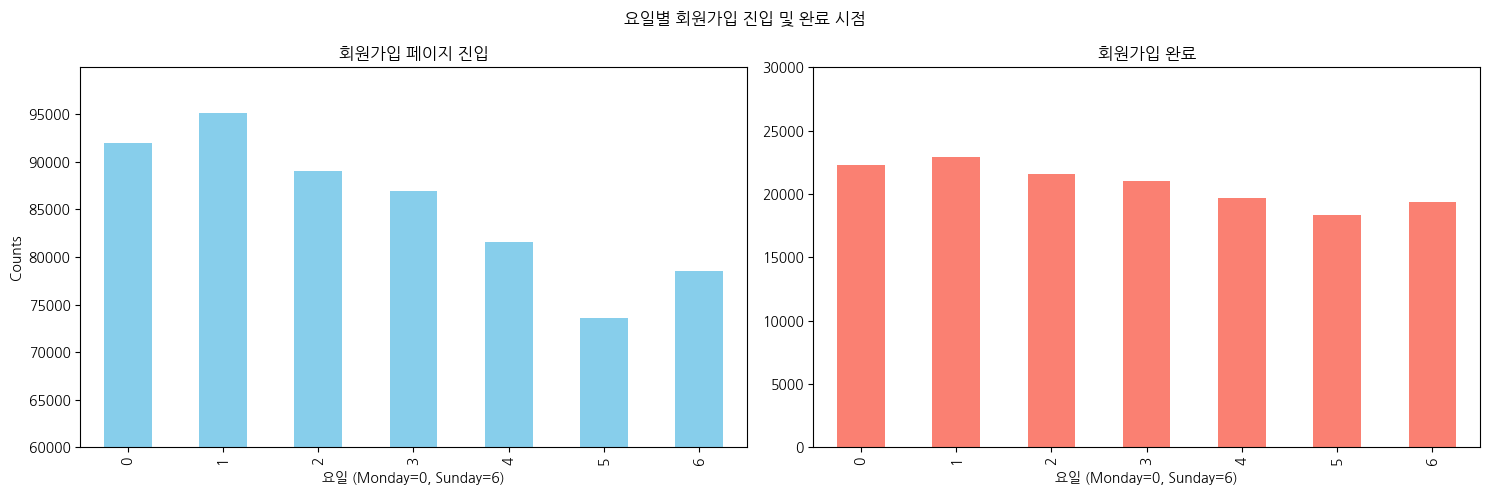

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1행 2열의 서브플롯 생성

# 첫 번째 그래프 (회원가입 페이지 진입)
signup_page['client_event_time'].dt.weekday.value_counts().sort_index().plot(
    kind='bar', ax=axes[0], color='skyblue'
)
axes[0].set_title('회원가입 페이지 진입')
axes[0].set_ylabel('Counts')
axes[0].set_xlabel('요일 (Monday=0, Sunday=6)')
axes[0].set_ylim(60000) 

# 두 번째 그래프 (회원가입 완료)
complete_signup['client_event_time'].dt.weekday.value_counts().sort_index().plot(
    kind='bar', ax=axes[1], color='salmon'
)
axes[1].set_title('회원가입 완료')
axes[1].set_xlabel('요일 (Monday=0, Sunday=6)')
axes[1].set_ylim(0, 30000) 

plt.suptitle('요일별 회원가입 진입 및 완료 시점')  
plt.tight_layout()
plt.show()

- 요일별 회원가입 페이지 진입 수는 화요일이 가장 많은 것으로 나타났다.
- 진입 수 결과와 비교했을 때 예상대로, 요일별 회원가입 페이지 완료 수는 화요일이 가장 많은 것으로 확인할 수 있다.

#### 회원가입 완료율

In [ ]:
# 총 회원가입 시도 수 -> 회원가입 페이지 접속한 경우 시도했다고 가정
total_signups = signup_page['event_type'].count()
# 회원가입 완료 수
completed_signups = complete_signup['event_type'].count()

signup_completion_rate = (completed_signups / total_signups) * 100

# 결과 출력
print(f'회원가입 완료 비율: {signup_completion_rate:.2f}%')

회원가입 완료 비율: 24.32%


In [ ]:
# user_id가 없는 메인 페이지 방문자 수
anonymous_visitors = df_main_page['user_id'].isna().sum()

# 회원가입 완료한 유저 수 (가입을 완료한 user_id 수)
total_completed_signups = complete_signup['user_id'].nunique()

# 비로그인 방문자 대비 회원가입률 계산
signup_conversion_rate = (total_completed_signups / anonymous_visitors) * 100

print(f"비로그인 방문자 대비 회원가입율: {signup_conversion_rate:.2f}%")

비로그인 방문자 대비 회원가입률: 9.01%


#### 시간대별 회원가입 완료율

In [ ]:
df2_signup_page = signup_page.copy()
df2_complete_signup = complete_signup.copy()

df2_signup_page['signup_hour'] = signup_page['client_event_time'].dt.hour
df2_complete_signup['signup_hour'] = df2_complete_signup['client_event_time'].dt.hour

signups_by_hour = df2_signup_page.groupby('signup_hour')['event_type'].count()
completed_by_hour = df2_complete_signup.groupby('signup_hour')['user_id'].count()

hourly_conversion_rate = (completed_by_hour / signups_by_hour * 100).fillna(0)
print(hourly_conversion_rate)

signup_hour
0     24.577292
1     24.397400
2     23.215494
3     22.783556
4     22.180390
5     21.969567
6     21.694058
7     21.807419
8     23.349683
9     23.944882
10    24.208699
11    25.220302
12    24.247279
13    24.932656
14    25.084442
15    24.967011
16    24.585186
17    25.105681
18    24.520612
19    24.643087
20    24.647327
21    24.424455
22    24.467398
23    22.870872
dtype: float64


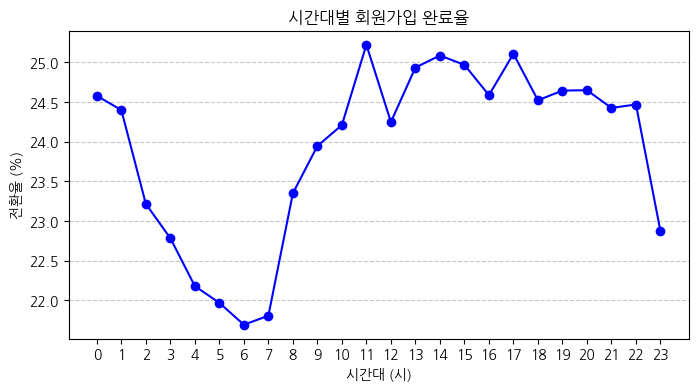

In [45]:
df2_signup_page = signup_page.copy()
df2_complete_signup = complete_signup.copy()

df2_signup_page['signup_hour'] = signup_page['client_event_time'].dt.hour
df2_complete_signup['signup_hour'] = df2_complete_signup['client_event_time'].dt.hour

# 시간대별 가입 시도 수
signups_by_hour = df2_signup_page.groupby('signup_hour')['event_type'].count()

# 시간대별 가입 완료 수
completed_by_hour = df2_complete_signup.groupby('signup_hour')['user_id'].count()

# 시간대별 전환율 계산
hourly_conversion_rate = (completed_by_hour / signups_by_hour * 100).fillna(0)

plt.figure(figsize=(8, 4))
hourly_conversion_rate.sort_index().plot(kind='line', marker='o', linestyle='-', color='b')
plt.title("시간대별 회원가입 완료율")
plt.xlabel("시간대 (시)")
plt.ylabel("전환율 (%)")
plt.xticks(range(0, 24, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df2_signup_page = signup_page.copy()
df2_complete_signup = complete_signup.copy()

df2_signup_page['signup_month'] = signup_page['client_event_time'].dt.month
df2_complete_signup['signup_month'] = df2_complete_signup['client_event_time'].dt.month

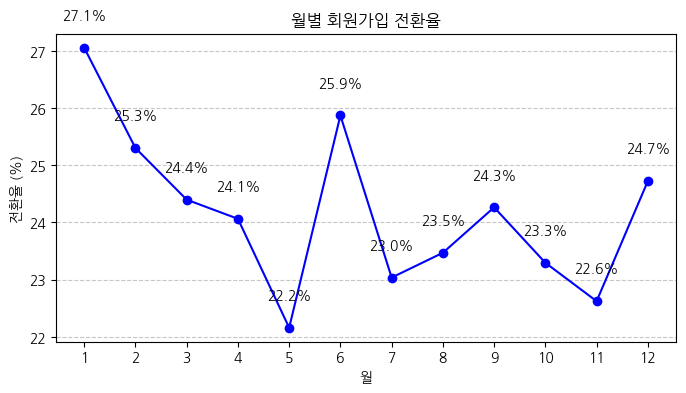

In [25]:
# 월별 가입 시도 수 계산
signups_by_month = df2_signup_page.groupby('signup_month')['client_event_time'].count()

# 월별 가입 완료 수 계산
completed_by_month = df2_complete_signup.groupby('signup_month')['user_id'].count()

# 가입 시도가 없는 달이 있을 경우 0으로 채우기
signups_by_month = signups_by_month.reindex(range(1, 13), fill_value=0)
completed_by_month = completed_by_month.reindex(range(1, 13), fill_value=0)

# 월별 전환율 계산
monthly_conversion_rate = (completed_by_month / signups_by_month * 100).fillna(0)

plt.figure(figsize=(8, 4))
monthly_conversion_rate.sort_index().plot(kind='line', marker='o', linestyle='-', color='b')
plt.title("월별 회원가입 전환율")
plt.xlabel("월")
plt.ylabel("전환율 (%)")

plt.xticks(ticks=monthly_conversion_rate.index, labels=monthly_conversion_rate.index.astype(str))

plt.grid(axis='y', linestyle='--', alpha=0.7)

for month, rate in monthly_conversion_rate.items():
    plt.text(month, rate + 0.5, f"{rate:.1f}%", ha='center', fontsize=10)

plt.show()

#### 주중 vs 주말 접속자 가입 분석
- 주중 방문 유저의 가입 확률과 주말 방문 유저의 가입 확률 비교

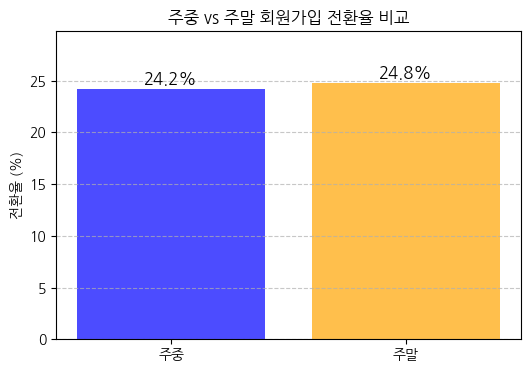

In [ ]:
df2_signup_page = signup_page.copy()
df2_complete_signup = complete_signup.copy()

df2_signup_page['weekday'] = df2_signup_page['client_event_time'].dt.weekday
df2_complete_signup['weekday'] = df2_complete_signup['client_event_time'].dt.weekday

df2_signup_page['weekday_flag'] = df2_signup_page['weekday'].apply(lambda x: '주중' if x < 5 else '주말')
df2_complete_signup['weekday_flag'] = df2_complete_signup['weekday'].apply(lambda x: '주중' if x < 5 else '주말')

# 주중 & 주말 방문자 수
visits_by_weekday = df2_signup_page['weekday_flag'].value_counts()

# 주중 & 주말 회원가입 완료 수
signups_by_weekday = df2_complete_signup['weekday_flag'].value_counts()

# 가입 확률(전환율) 계산
conversion_rate = (signups_by_weekday / visits_by_weekday * 100).fillna(0)

plt.figure(figsize=(6, 4))
plt.bar(conversion_rate.index, conversion_rate.values, color=['blue', 'orange'], alpha=0.7)

plt.title("주중 vs 주말 회원가입 전환율 비교")
plt.ylabel("전환율 (%)")
plt.ylim(0, max(conversion_rate) + 5)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(conversion_rate):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=12)

plt.show()

- 앞선 분석 결과에서 요일별 메인 페이지 방문 후 가입 전환율을 비교했을 때,               
  예상대로 주말의 회원가입 전환율이 24.8%의 비율로 주중 회원가입 전환율 보다 0.6% 높게 나타난 것을 확인할 수 있다. 

#### OS별 회원가입 완료율

In [32]:
signups_by_os = df2_signup_page.groupby('os_name')['event_type'].count()
completed_by_os = df2_complete_signup.groupby('os_name')['user_id'].count()

hourly_conversion_rate = (completed_by_os / signups_by_os * 100).fillna(0)
print(hourly_conversion_rate)

os_name
AVG Secure Browser       5.555556
Android Browser          0.502513
Avast Secure Browser     8.411215
Chrome                   8.601572
Chrome Headless          0.000000
Chrome Mobile           12.132839
Chrome WebView           7.767046
Chromium                66.666667
Edge                     8.175130
Electron                 0.000000
Facebook                 5.818219
Firefox                  9.743202
GSA                      7.265469
IE                       0.000000
Instagram                6.406824
Line                     0.000000
MIUI Browser             3.418803
Maxthon                  0.000000
Mobile Safari            5.901939
Opera                    8.624709
Opera Touch              0.000000
Puffin                   0.000000
QQ                       0.000000
QQBrowser                0.000000
Quark                    0.000000
Safari                   6.394183
Samsung Browser          5.003710
Silk                     0.000000
UCBrowser                0.000000
WeChat

#### 인스타 브라우저 이용 접속자 가입 분석

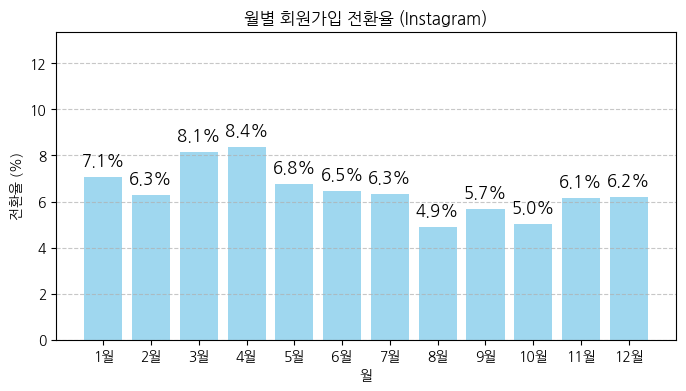

In [36]:
df2_signup_page['signup_month'] = df2_signup_page['client_event_time'].dt.month
df2_complete_signup['signup_month'] = df2_complete_signup['client_event_time'].dt.month

# Instagram에서 회원가입 시도한 데이터 필터링
insta_signup_page = df2_signup_page[df2_signup_page['os_name'] == 'Instagram']
insta_complete_signup = df2_complete_signup[df2_complete_signup['os_name'] == 'Instagram']

# 월별 가입 시도 수
signups_by_month = insta_signup_page.groupby('signup_month')['event_type'].count()
# 월별 가입 완료 수
completed_by_month = insta_complete_signup.groupby('signup_month')['user_id'].count()

# 월별 전환율
monthly_conversion_rate = (completed_by_month / signups_by_month * 100).fillna(0)

month_labels = [str(i) + "월" for i in range(1, 13)]
monthly_conversion_rate = monthly_conversion_rate.reindex(range(1, 13), fill_value=0)

plt.figure(figsize=(8, 4))
plt.bar(month_labels, monthly_conversion_rate, color='skyblue', alpha=0.8)

plt.title("월별 회원가입 전환율 (Instagram)")
plt.xlabel("월")
plt.ylabel("전환율 (%)")
plt.ylim(0, max(monthly_conversion_rate) + 5)  # Y축 범위 조정
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대 위에 값 표시
for i, v in enumerate(monthly_conversion_rate):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=12)

plt.show()

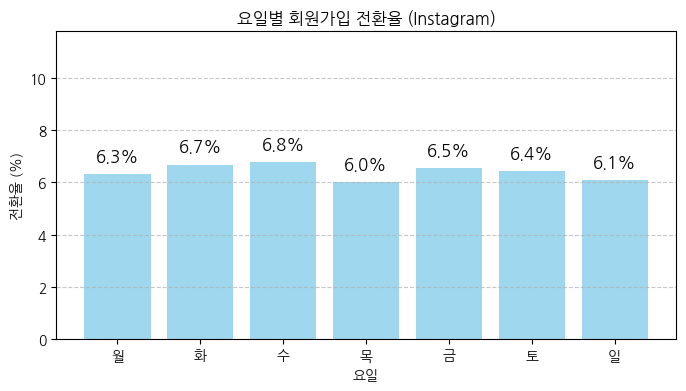

In [ ]:
df2_signup_page['signup_weekday'] = df2_signup_page['client_event_time'].dt.weekday
df2_complete_signup['signup_weekday'] = df2_complete_signup['client_event_time'].dt.weekday

# Instagram에서 회원가입 시도한 데이터 필터링
insta_signup_page = df2_signup_page[df2_signup_page['os_name'] == 'Instagram']
insta_complete_signup = df2_complete_signup[df2_complete_signup['os_name'] == 'Instagram']

# 요일별 가입 시도 수
signups_by_weekday = insta_signup_page.groupby('signup_weekday')['event_type'].count()
# 요일별 가입 완료 수
completed_by_weekday = insta_complete_signup.groupby('signup_weekday')['user_id'].count()

# 요일별 전환율 계산
weekly_conversion_rate = (completed_by_weekday / signups_by_weekday * 100).fillna(0)

weekday_labels = ['월', '화', '수', '목', '금', '토', '일']
df2_signup_page['signup_weekday'] = df2_signup_page['signup_weekday'].map(lambda x: weekday_labels[x])
weekly_conversion_rate = weekly_conversion_rate.reindex(range(7), fill_value=0)

plt.figure(figsize=(8, 4))
bars = plt.bar(df2_signup_page['signup_weekday'], weekly_conversion_rate, color='skyblue', alpha=0.8)

for bar, (index, value) in zip(bars, weekly_conversion_rate.items()):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.5, f"{value:.1f}%", ha='center', fontsize=12)

plt.title("요일별 회원가입 전환율 (Instagram)")
plt.xlabel("요일")
plt.ylabel("전환율 (%)")
plt.ylim(0, max(weekly_conversion_rate) + 5)  # Y축 범위 조정
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

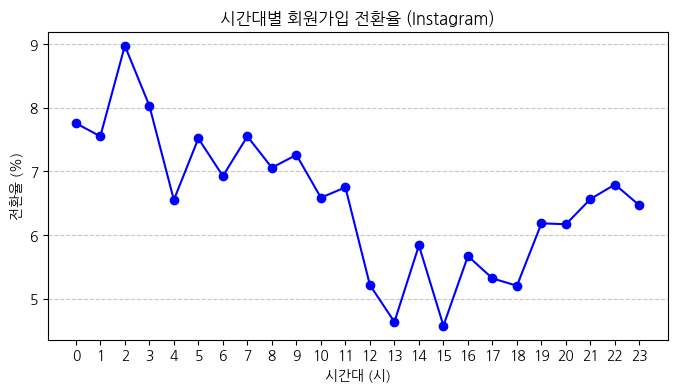

In [ ]:
insta_signup_page = df2_signup_page[df2_signup_page['os_name'] == 'Instagram']
insta_complete_signup = df2_complete_signup[df2_complete_signup['os_name'] == 'Instagram']

# 시간대별 가입 시도 수
signups_by_hour = insta_signup_page.groupby('signup_hour')['event_type'].count()

# 시간대별 가입 완료 수
completed_by_hour = insta_complete_signup.groupby('signup_hour')['user_id'].count()

# 시간대별 전환율 계산 (가입 완료 수 / 가입 시도 수 * 100)
hourly_conversion_rate = (completed_by_hour / signups_by_hour * 100).fillna(0)

plt.figure(figsize=(8, 4))
hourly_conversion_rate.sort_index().plot(kind='line', marker='o', linestyle='-', color='b')

plt.title("시간대별 회원가입 전환율 (Instagram)")
plt.xlabel("시간대 (시)")
plt.ylabel("전환율 (%)")
plt.xticks(range(0, 24, 1))  # x축을 0~23시간 단위로 설정
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### 브라우저 카테고리 매핑

In [ ]:
# 브라우저 데이터 추출 및 집계
browser_counts = signup_page['os_name'].value_counts().reset_index()
browser_counts.columns = ['browser', 'count']

# 브라우저 카테고리 매핑
# QQ: 중국 Tencent가 운영하는 메신저

browser_category = {
    "모바일": {"Mobile Safari", "Samsung Browser", "Chrome Mobile", "WebKit", "Chrome WebView",
             "MIUI Browser", "Android Browser", "GSA", "UCBrowser", "Opera Touch", "Puffin", "Silk","QQBrowser"},
    "웹": {"Chrome", "Edge", "Whale", "Safari", "Firefox", "Opera", "Chromium",
           "Avast Secure Browser", "AVG Secure Browser", "Yandex", "IE", "Maxthon","Chrome Headless", "Electron",
           "Opera Mini", "MetaSr", "Konqueror", "Mozilla", "NetFront", "Coc Coc"},
    "SNS": {"Instagram", "Facebook", "WeChat", "QQ", "Line"}
}

In [21]:
def assign_category(browser):
    browser = browser.lower()
    for category, browser_list in browser_category.items():
        if any(b.lower() in browser for b in browser_list):  
            return category
    return "기타" 

# 브라우저별 카테고리 추가
browser_counts['category'] = browser_counts['browser'].apply(assign_category)

browser_category_sum = browser_counts.groupby('category')['count'].sum().reset_index()

print(browser_category_sum)

  category   count
0      SNS   74143
1       기타      54
2      모바일  168607
3        웹  353950


### 데이터 전처리 
- 22~23년도 데이터만 보기

In [ ]:
# 로그인 방식 : test 제거
df_complete_signup = complete_signup[complete_signup['type'] != 'test']

# 2022-2023년도 데이터만 필터링
df_signup_page = signup_page[signup_page['client_event_time'].dt.year.isin([2022, 2023])]
df_complete_signup = df_complete_signup[df_complete_signup['client_event_time'].dt.year.isin([2022, 2023])]

In [ ]:
# 총 회원가입 시도 수 -> 회원가입 페이지 접속한 경우 시도했다고 가정
total_signups = df_signup_page['event_type'].count()
# 회원가입 완료 수
completed_signups = df_complete_signup['user_id'].nunique()

signup_completion_rate = (completed_signups / total_signups) * 100

# 가입 이탈율 계산
abandonment_rate = 100 - signup_completion_rate

print(f'회원가입 완료 비율: {signup_completion_rate:.2f}%')
print(f'가입 이탈율: {abandonment_rate:.2f}%')

회원가입 완료 비율: 24.32%
가입 이탈율: 75.68%


### 22-23년도 회원가입율

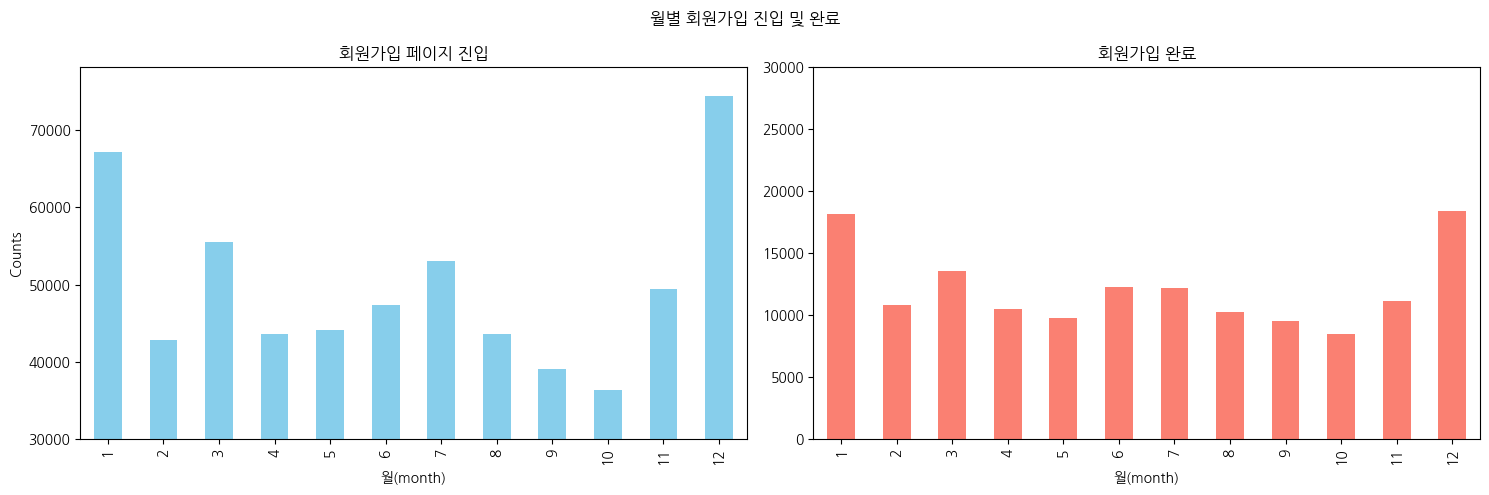

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  

# 회원가입 페이지 진입
df_signup_page['client_event_time'].dt.month.value_counts().sort_index().plot(
    kind='bar', ax=axes[0], color='skyblue'
)
axes[0].set_title('회원가입 페이지 진입')
axes[0].set_ylabel('Counts')
axes[0].set_xlabel('월(month)')
axes[0].set_ylim(30000) 

# 회원가입 완료
df_complete_signup['client_event_time'].dt.month.value_counts().sort_index().plot(
    kind='bar', ax=axes[1], color='salmon'
)
axes[1].set_title('회원가입 완료')
axes[1].set_xlabel('월(month)')
axes[1].set_ylim(0, 30000) 

plt.suptitle('월별 회원가입 진입 및 완료')  
plt.tight_layout()
plt.show()

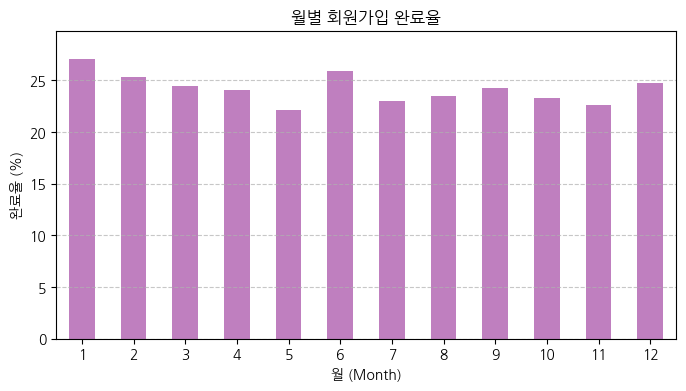

In [34]:
# 월별 회원가입 페이지 진입 수
signup_entry_counts = df_signup_page['client_event_time'].dt.month.value_counts().sort_index()
# 월별 회원가입 완료 수
signup_complete_counts = df_complete_signup['client_event_time'].dt.month.value_counts().sort_index()

# 회원가입 완료율 계산 (가입 페이지 진입 대비 완료율)
monthly_conversion_rate = (signup_complete_counts / signup_entry_counts * 100).fillna(0)

plt.figure(figsize=(8, 4))

monthly_conversion_rate.plot(kind='bar', color='purple', alpha=0.5)

plt.title("월별 회원가입 완료율")
plt.xlabel("월 (Month)")
plt.ylabel("완료율 (%)")

plt.xticks(ticks=range(len(monthly_conversion_rate.index)), labels=monthly_conversion_rate.index, rotation=0)

plt.ylim(0, max(monthly_conversion_rate) * 1.1) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
# 월별 회원가입 페이지 진입 수
signup_entry_counts = df_signup_page['client_event_time'].dt.month.value_counts().sort_index()
# 월별 회원가입 완료 수
signup_complete_counts = df_complete_signup['client_event_time'].dt.month.value_counts().sort_index()

# 회원가입 완료율 계산 (가입 페이지 진입 대비 완료율)
monthly_conversion_rate = (signup_complete_counts / signup_entry_counts * 100).fillna(0)

plt.figure(figsize=(8, 4))

monthly_conversion_rate.plot(kind='bar', color='purple', alpha=0.5)

plt.title("월별 회원가입 완료율")
plt.xlabel("월 (Month)")
plt.ylabel("완료율 (%)")

plt.xticks(ticks=range(len(monthly_conversion_rate.index)), labels=monthly_conversion_rate.index, rotation=0)

plt.ylim(0, max(monthly_conversion_rate) * 1.1) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### 브라우저 카테고리별 가입 완료율

In [29]:
# 브라우저 데이터 추출 및 집계
browser_counts = df_complete_signup['os_name'].value_counts().reset_index()
browser_counts.columns = ['browser', 'count']

# 브라우저 카테고리 매핑
# QQ: 중국 Tencent가 운영하는 메신저

browser_category = {
    "모바일": {"Mobile Safari", "Samsung Browser", "Chrome Mobile", "WebKit", "Chrome WebView",
             "MIUI Browser", "Android Browser", "GSA", "UCBrowser", "Opera Touch", "Puffin", "Silk","QQBrowser"},
    "웹": {"Chrome", "Edge", "Whale", "Safari", "Firefox", "Opera", "Chromium",
           "Avast Secure Browser", "AVG Secure Browser", "Yandex", "IE", "Maxthon","Chrome Headless", "Electron",
           "Opera Mini", "MetaSr", "Konqueror", "Mozilla", "NetFront", "Coc Coc"},
    "SNS": {"Instagram", "Facebook", "WeChat", "QQ", "Line"}
}

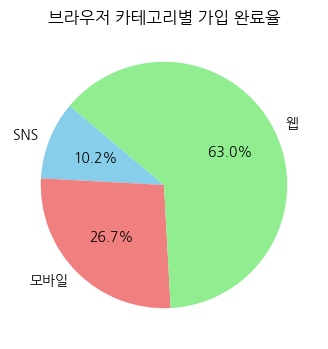

  category  count
0      SNS   4687
1      모바일  12228
2        웹  28830


In [36]:
def assign_category(browser):
    browser = browser.lower()
    for category, browser_list in browser_category.items():
        if any(b.lower() in browser for b in browser_list):  
            return category
    return "기타" 

# 브라우저별 카테고리 추가
browser_counts['category'] = browser_counts['browser'].apply(assign_category)
browser_category_sum = browser_counts.groupby('category')['count'].sum().reset_index()

labels = browser_category_sum['category']
sizes = browser_category_sum['count']

plt.figure(figsize=(5, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange'])

plt.title("브라우저 카테고리별 가입 완료율")
plt.show()
print(browser_category_sum)